In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('telcom_data.csv')

In [3]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,04-04-2019 12:01,770.0,25-04-2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.311450e+19,09-04-2019 13:04,235.0,25-04-2019 08:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.311450e+19,09-04-2019 17:42,1.0,25-04-2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.311450e+19,10-04-2019 00:31,486.0,25-04-2019 07:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.311450e+19,12-04-2019 20:10,565.0,25-04-2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,29-04-2019 07:28,451.0,30-04-2019 06:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,29-04-2019 07:28,483.0,30-04-2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,29-04-2019 07:28,283.0,30-04-2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,29-04-2019 07:28,696.0,30-04-2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


In [7]:
# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Calculate the mean of the numeric columns and fill NaN values
df[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())

In [9]:
# Fill NaN values only for numeric columns with their respective means
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x)

3.1

In [12]:
# Calculate average TCP retransmission
# Group the data by 'MSISDN/Number', and calculate the mean of 'TCP DL Retrans. Vol (Bytes)' and 'TCP UL Retrans. Vol (Bytes)'
# Then, take the overall mean of the two mean values for each group
avg_tcp_retransmission = df.groupby('MSISDN/Number')[['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']].mean().mean(axis=1)

# Fill missing values in the 'avg_tcp_retransmission' with the overall mean
# This will help handle any NaN (Not a Number) values in the resulting Series
avg_tcp_retransmission.fillna(avg_tcp_retransmission.mean(), inplace=True)

# Calculate average RTT (Round Trip Time)
# Group the data by 'MSISDN/Number', and calculate the mean of 'Avg RTT DL (ms)' and 'Avg RTT UL (ms)'
# Then, take the overall mean of the two mean values for each group
avg_rtt = df.groupby('MSISDN/Number')[['Avg RTT DL (ms)', 'Avg RTT UL (ms)']].mean().mean(axis=1)

# Fill missing values in the 'avg_rtt' with the overall mean
avg_rtt.fillna(avg_rtt.mean(), inplace=True)

#  Replace missing values in 'Handset Type' with the mode (most common value) for each 'MSISDN/Number'
# Group the data by 'MSISDN/Number', and find the mode (most common value) of 'Handset Type' for each group
# If there are multiple modes, choose the first one; otherwise, set it to None
handset_mode = df.groupby('MSISDN/Number')['Handset Type'].agg(lambda x: x.mode().values[0] if len(x.mode()) > 0 else None)

#  Calculate average throughput
# Group the data by 'MSISDN/Number', and calculate the mean of 'Avg Bearer TP DL (kbps)' and 'Avg Bearer TP UL (kbps)'
# Then, take the overall mean of the two mean values for each group
avg_throughput = df.groupby('MSISDN/Number')[['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']].mean().mean(axis=1)

# Fill missing values in the 'avg_throughput' with the overall mean
avg_throughput.fillna(avg_throughput.mean(), inplace=True)

#  Create a new DataFrame with aggregated information
# Combine all the calculated averages and the 'Handset_Type' mode into a new DataFrame
aggregated_data = pd.DataFrame({
    'Avg_TCP_Retransmission': avg_tcp_retransmission,
    'Avg_RTT': avg_rtt,
    'Handset_Type': handset_mode,
    'Avg_Throughput': avg_throughput
})

# Step 7: Reset the index to make 'MSISDN/Number' a column instead of the index
# This step is done to bring the 'MSISDN/Number' back as a regular column in the DataFrame
aggregated_data.reset_index(inplace=True)

# Step 8: Display the aggregated data
# Print the final DataFrame that contains the aggregated information
print(aggregated_data)

        MSISDN/Number  Avg_TCP_Retransmission     Avg_RTT  \
0        3.360100e+10            1.078479e+07   23.000000   
1        3.360100e+10            1.078479e+07   15.500000   
2        3.360100e+10            1.078479e+07   63.729294   
3        3.360101e+10            3.803623e+05   42.000000   
4        3.360101e+10            7.735101e+06   29.750000   
...               ...                     ...         ...   
106852   3.379000e+10            1.078479e+07   20.000000   
106853   4.188282e+10            8.491987e+06  154.561991   
106854   3.197020e+12            1.078479e+07   63.729294   
106855   3.370000e+14            1.078479e+07   63.729294   
106856   8.823970e+14            1.078479e+07   63.729294   

                            Handset_Type  Avg_Throughput  
0         Huawei P20 Lite Huawei Nova 3E       38.000000  
1                 Apple iPhone 7 (A1778)       49.500000  
2                              undefined       48.500000  
3                Apple iPhone 5

In [13]:
aggregated_data.isnull().sum()

MSISDN/Number             0
Avg_TCP_Retransmission    0
Avg_RTT                   0
Handset_Type              0
Avg_Throughput            0
dtype: int64

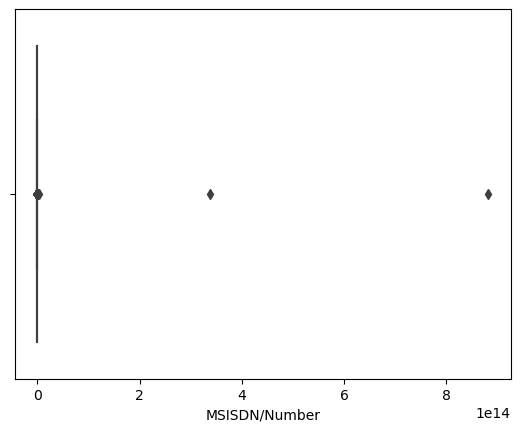

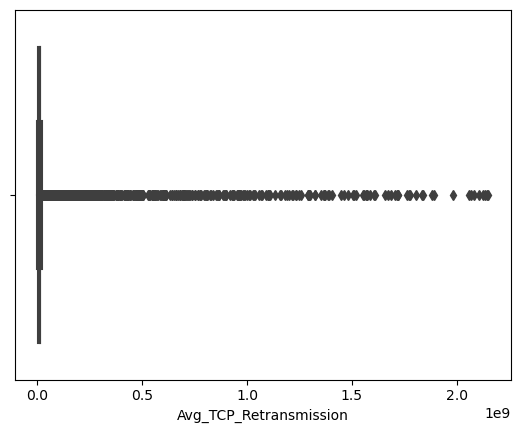

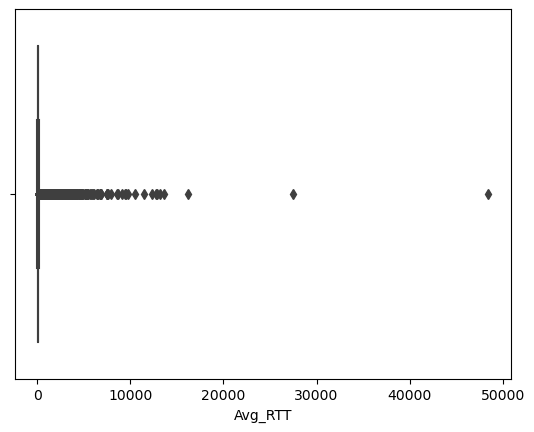

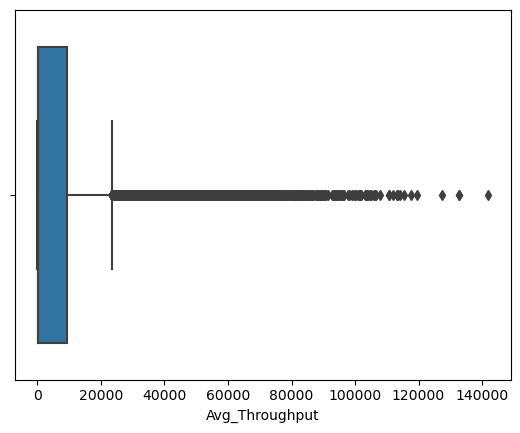

In [14]:
# Filter out non-numeric columns
numeric_cols = aggregated_data.select_dtypes(include=np.number).columns

# Plot boxplots for numeric columns
for col in numeric_cols:
    sns.boxplot(data=aggregated_data, x=col)
    plt.show()

In [15]:
# Filter out only the numeric columns from the DataFrame
# This will create a new DataFrame called 'numeric_data' containing only the numeric columns from 'aggregated_data'
numeric_data = aggregated_data.select_dtypes(include=np.number)

# Calculate percentiles (Q1, Q2, Q3) for the numeric columns
# Using the np.percentile function to calculate the 25th (Q1), 50th (Q2 or median), and 75th (Q3) percentiles
q1 = np.percentile(numeric_data, 25)
q2 = np.percentile(numeric_data, 50)
q3 = np.percentile(numeric_data, 75)

# Step 4: Display the calculated percentiles
print(f"My Q1 = {q1}, Q2 = {q2}, Q3 = {q3}")

My Q1 = 52.5, Q2 = 32121.25, Q3 = 10013304470.125


In [16]:
iqr=q3-q1
iqr

10013304417.625

In [17]:
# Calculate the lower and upper range using the interquartile range (IQR) method
lower_range = q1 - iqr * 1.5
upper_range = q3 + iqr * 1.5

# Display the calculated lower and upper ranges
print(f"Lower range = {lower_range}, Upper Range = {upper_range}")

Lower range = -15019956573.9375, Upper Range = 25033261096.5625


In [18]:
def find_outliers_iqr(df, threshold=1.5):
    outliers = pd.DataFrame()
    
    for column in df.columns:
        # Check if the column is numeric (exclude non-numeric columns)
        if np.issubdtype(df[column].dtype, np.number):
            # Calculate the first quartile (Q1), third quartile (Q3), and the interquartile range (IQR)
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            
            # Calculate the lower and upper bounds for outliers
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            
            # Find the rows that have values below the lower_bound or above the upper_bound
            column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            outliers = pd.concat([outliers, column_outliers])
            
            # Replace the outliers with the mean value of the column
            df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                                  df[column].mean(),
                                  df[column])
    
    return outliers

In [19]:
# Use the `find_outliers_iqr` function to find and replace outliers in 'aggregated_data'
data = find_outliers_iqr(aggregated_data)

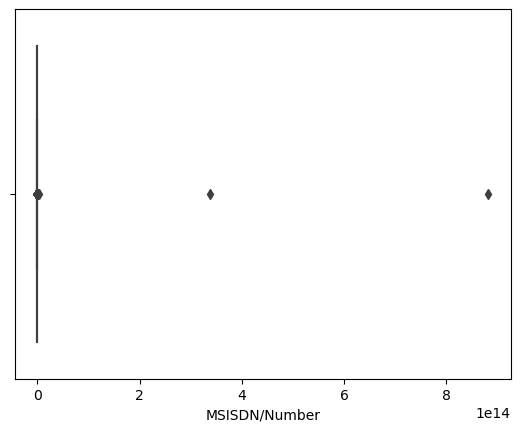

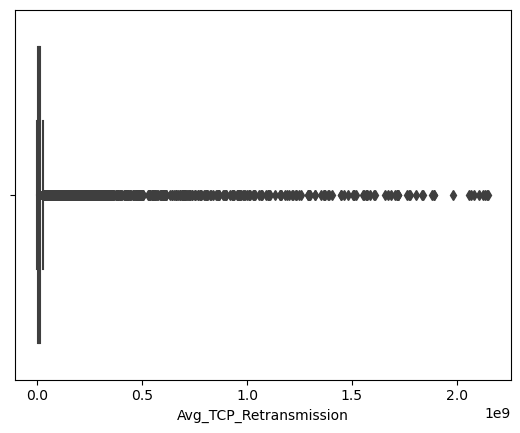

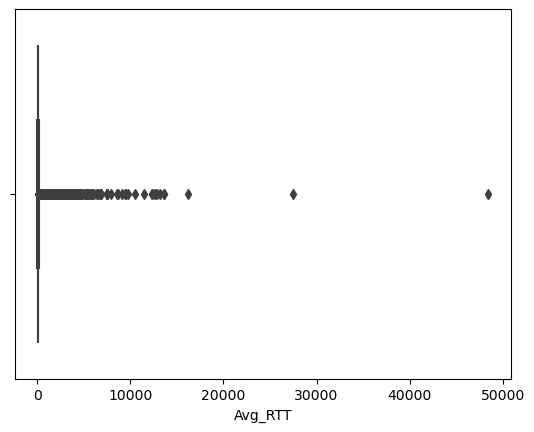

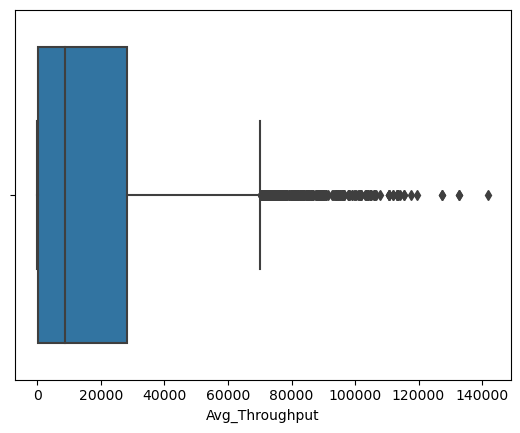

In [20]:
# Step 1: Get the numeric columns from the DataFrame 'aggregated_data'
# This will create a pandas Index object containing the names of the numeric columns
numeric_cols = aggregated_data.select_dtypes(include=np.number).columns

# Step 2: Plot boxplots for each numeric column in 'data'
# The loop iterates through each numeric column, plots the boxplot, and displays it using plt.show()
for col in numeric_cols:
    sns.boxplot(data=data, x=col)
    plt.show()

### 3.2

In [21]:
# Step 1: Create an empty list to store the names of the numerical columns
numerical_data = []

# Step 2: Loop through each column in the 'data' DataFrame
for col in data.columns:
    # Step 3: Check if the data type of the column is not "object" (i.e., not a string or categorical column)
    if data[col].dtypes != "object":
        # Step 4: If the column is numeric, append its name to the 'numerical_data' list
        numerical_data.append(col)

In [22]:
# Step 1: Loop through each column in the 'data' DataFrame
for i in data.columns:
    print("*" * 50)
    # Step 2: Print the data type of the current column
    print(f"The datatype for {i} is {data[i].dtypes}")
    
    # Step 3: Check if the data type is not "object" (i.e., if it's a numeric column)
    if data[i].dtypes != "object":
        # Step 4: Print the top 10 categories for numeric columns
        print(f"Top 10 categories for {i}:")
        print(data[i].value_counts().head(10))
    print("*" * 50)

**************************************************
The datatype for MSISDN/Number is float64
Top 10 categories for MSISDN/Number:
MSISDN/Number
4.511471e+10    2884
3.366383e+10       3
3.366147e+10       3
3.367833e+10       3
3.366960e+10       3
3.366101e+10       3
3.366933e+10       3
3.366491e+10       3
3.366915e+10       3
3.366913e+10       3
Name: count, dtype: int64
**************************************************
**************************************************
The datatype for Avg_TCP_Retransmission is float64
Top 10 categories for Avg_TCP_Retransmission:
Avg_TCP_Retransmission
1.078479e+07    9653
1.042375e+07    1223
1.040560e+07     103
3.804943e+05      45
1.040562e+07      40
1.040562e+07      30
3.811593e+05      27
1.059520e+07      20
3.798753e+05      18
1.040620e+07      16
Name: count, dtype: int64
**************************************************
**************************************************
The datatype for Avg_RTT is float64
Top 10 categories for Av

In [23]:
# Top 10 TCP values
top_10_tcp = data['Avg_TCP_Retransmission'].nlargest(10)
print("Top 10 TCP values:")
print(top_10_tcp)
print(50*"*")

Top 10 TCP values:
85785    2.150739e+09
32273    2.144060e+09
58026    2.134324e+09
31942    2.127330e+09
62049    2.105629e+09
70079    2.083297e+09
43629    2.068969e+09
48341    2.058902e+09
64113    1.984060e+09
98211    1.893435e+09
Name: Avg_TCP_Retransmission, dtype: float64
**************************************************


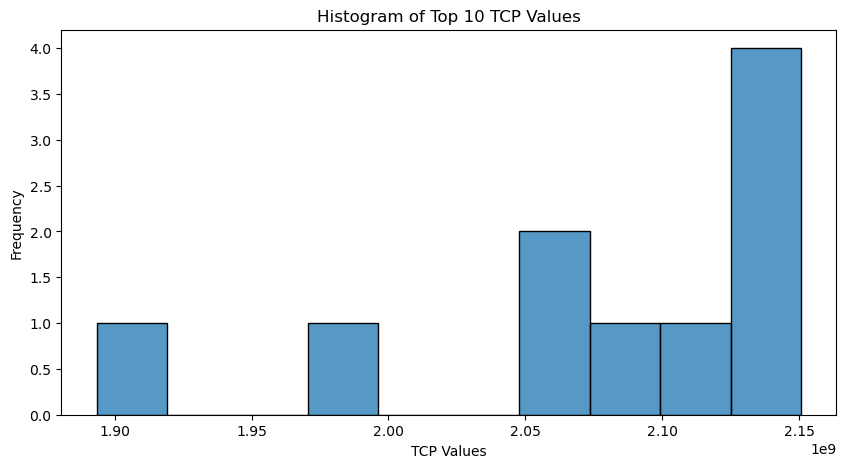

In [24]:
# Plot histogram for top 10 TCP values
plt.figure(figsize=(10, 5))
sns.histplot(data=top_10_tcp, bins=10)
plt.title("Histogram of Top 10 TCP Values")
plt.xlabel("TCP Values")
plt.ylabel("Frequency")
plt.show()

In [25]:
# Bottom 10 TCP values
print('\n',50*"*")
bottom_10_tcp = data['Avg_TCP_Retransmission'].nsmallest(10)
print("Bottom 10 TCP values:")
print(bottom_10_tcp)
print('\n',50*"*")


 **************************************************
Bottom 10 TCP values:
96977      64.5
102198     88.0
105775     88.5
100081    146.0
91991     154.0
101508    199.0
104810    209.0
93532     231.0
96394     284.5
74910     289.0
Name: Avg_TCP_Retransmission, dtype: float64

 **************************************************


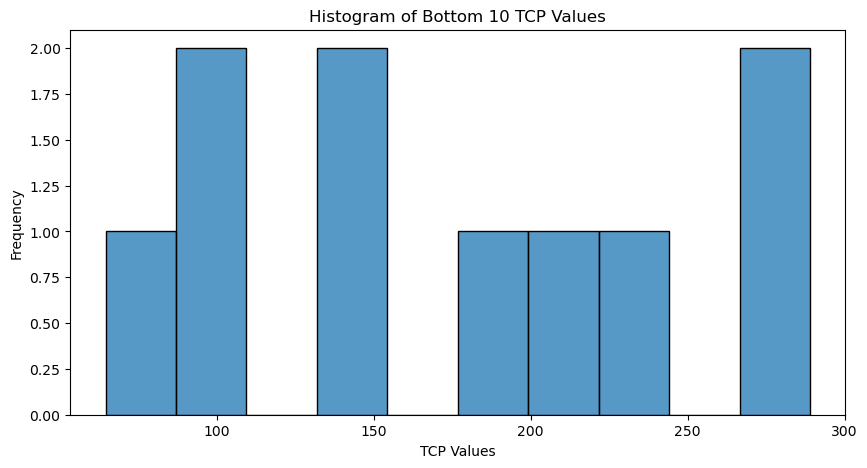

In [26]:
# Plot histogram for bottom 10 TCP values
plt.figure(figsize=(10, 5))
sns.histplot(data=bottom_10_tcp, bins=10)
plt.title("Histogram of Bottom 10 TCP Values")
plt.xlabel("TCP Values")
plt.ylabel("Frequency")
plt.show()

In [27]:
# Most frequent TCP values
print('\n',50*"*")
most_frequent_tcp = data['Avg_TCP_Retransmission'].value_counts().head(10)
print("Most frequent TCP values:")
print(most_frequent_tcp)
print('\n',50*"*")


 **************************************************
Most frequent TCP values:
Avg_TCP_Retransmission
1.078479e+07    9653
1.042375e+07    1223
1.040560e+07     103
3.804943e+05      45
1.040562e+07      40
1.040562e+07      30
3.811593e+05      27
1.059520e+07      20
3.798753e+05      18
1.040620e+07      16
Name: count, dtype: int64

 **************************************************


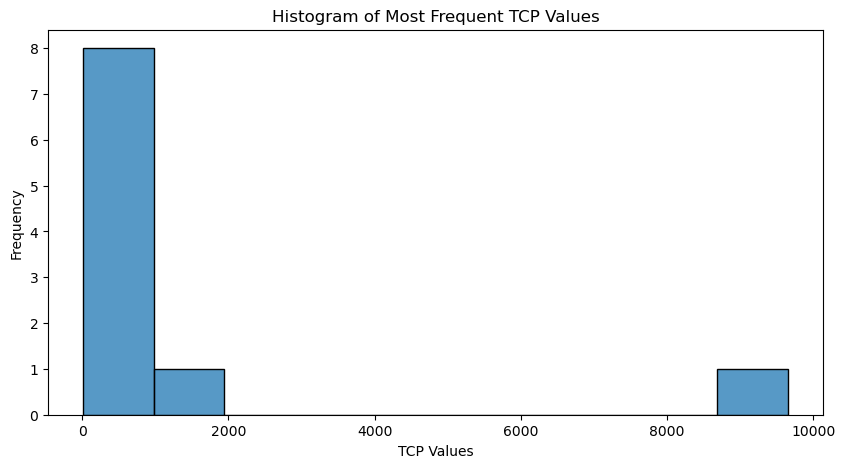

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(data=most_frequent_tcp, bins=10)
plt.title("Histogram of Most Frequent TCP Values")
plt.xlabel("TCP Values")
plt.ylabel("Frequency")
plt.show()


 **************************************************
Top 10 RTT values:
47983     48462.0
80249     27424.0
41944     16167.5
93844     13639.0
93844     13639.0
1713      13150.0
74240     12857.5
104325    12694.0
104325    12694.0
105752    12369.0
Name: Avg_RTT, dtype: float64

 **************************************************


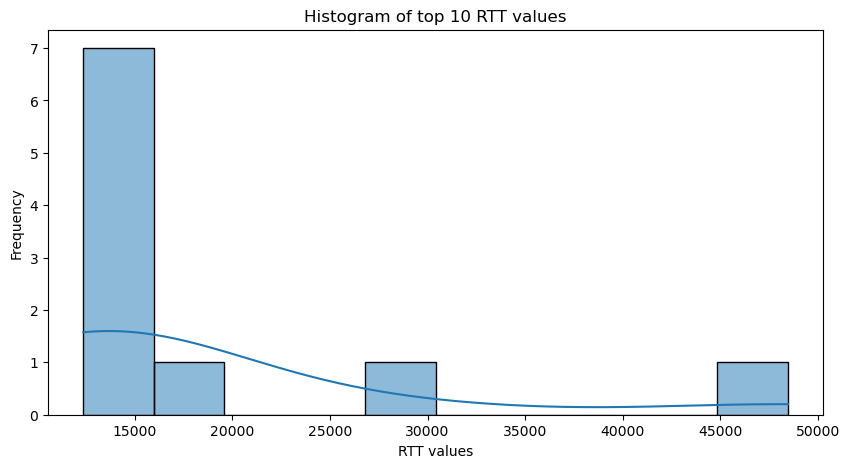

In [29]:
# Top 10 RTT values
print('\n',50*"*")
top_10_rtt = data['Avg_RTT'].nlargest(10)
print("Top 10 RTT values:")
print(top_10_rtt)
print('\n',50*"*")

plt.figure(figsize=(10, 5))
sns.histplot(data=top_10_rtt, bins=10,kde=True)
plt.title("Histogram of top 10 RTT values")
plt.xlabel("RTT values")
plt.ylabel("Frequency")
plt.show()


 **************************************************
Bottom 10 RTT values:
96921     5.5
301       6.5
90521     6.5
92139     6.5
92958     6.5
94072     6.5
95056     6.5
96790     6.5
99903     6.5
101542    6.5
Name: Avg_RTT, dtype: float64

 **************************************************


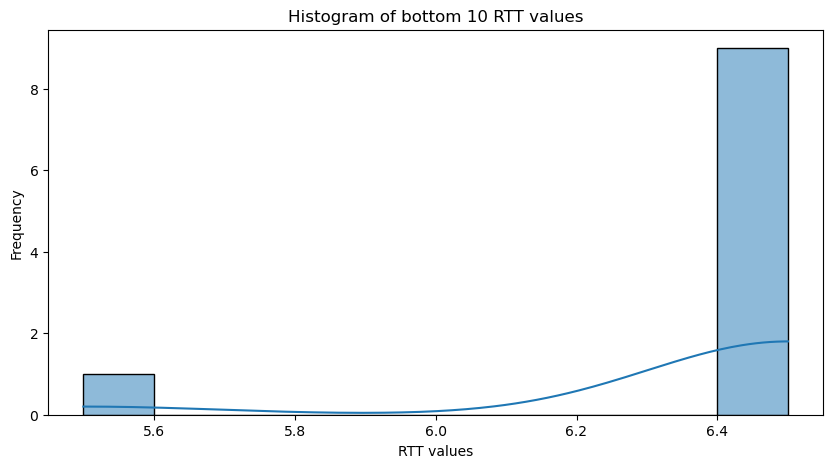

In [30]:
# Bottom 10 RTT values
print('\n',50*"*")
bottom_10_rtt = data['Avg_RTT'].nsmallest(10)
print("Bottom 10 RTT values:")
print(bottom_10_rtt)
print('\n',50*"*")
plt.figure(figsize=(10, 5))
sns.histplot(data=bottom_10_rtt, bins=10,kde=True)
plt.title("Histogram of bottom 10 RTT values")
plt.xlabel("RTT values")
plt.ylabel("Frequency")
plt.show()


 **************************************************
Most frequent RTT values:
Avg_RTT
63.729294    3112
14.500000     500
19.500000     452
19.000000     373
67.380062     340
20.000000     332
24.500000     315
22.000000     274
24.000000     273
15.000000     273
Name: count, dtype: int64

 **************************************************


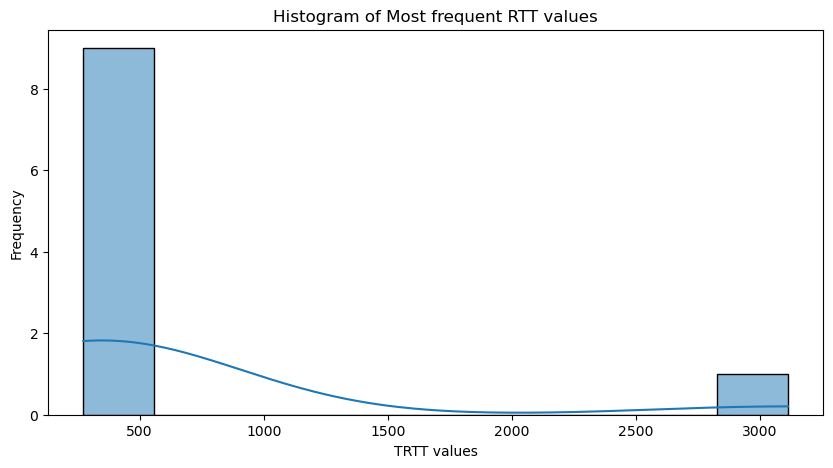

In [31]:
# Most frequent RTT values
print('\n',50*"*")
most_frequent_rtt = data['Avg_RTT'].value_counts().head(10)
print("Most frequent RTT values:")
print(most_frequent_rtt)
print('\n',50*"*")
plt.figure(figsize=(10, 5))
sns.histplot(most_frequent_rtt, bins=10,kde=True)
plt.title("Histogram of Most frequent RTT values")
plt.xlabel("TRTT values")
plt.ylabel("Frequency")
plt.show()


 **************************************************
Top 10 throughput values:
37838     141965.50
49595     132862.00
60763     132588.25
52830     127475.00
52830     127475.00
14564     119491.00
10359     117682.50
104697    115491.00
104697    115491.00
27722     114151.50
Name: Avg_Throughput, dtype: float64

 **************************************************


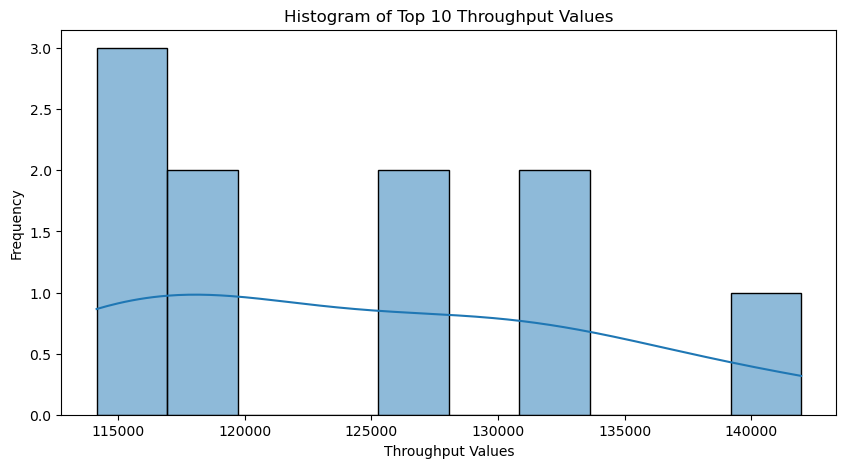

In [32]:
# Top 10 throughput values
print('\n',50*"*")
top_10_throughput = data['Avg_Throughput'].nlargest(10)
print("Top 10 throughput values:")
print(top_10_throughput)
print('\n',50*"*")

plt.figure(figsize=(10, 5))
sns.histplot(top_10_throughput, bins=10,kde=True)
plt.title("Histogram of Top 10 Throughput Values")
plt.xlabel("Throughput Values")
plt.ylabel("Frequency")
plt.show()


 **************************************************
Bottom 10 throughput values:
90941     0.0
91064     0.0
93060     0.0
93154     0.0
93945     0.0
94744     0.0
94815     0.0
98387     0.0
100765    0.0
101605    0.0
Name: Avg_Throughput, dtype: float64

 **************************************************


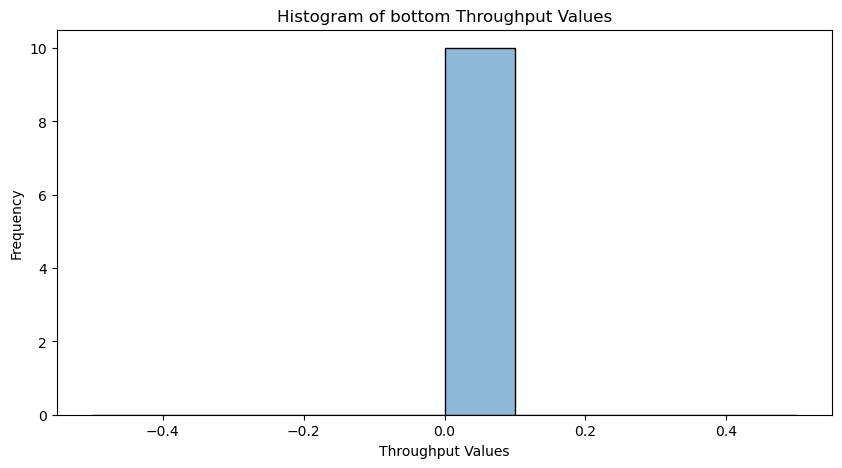

In [33]:
# Bottom 10 throughput values
print('\n',50*"*")
bottom_10_throughput = data['Avg_Throughput'].nsmallest(10)
print("Bottom 10 throughput values:")
print(bottom_10_throughput)
print('\n',50*"*")
plt.figure(figsize=(10, 5))
sns.histplot(bottom_10_throughput, bins=10,kde=True)
plt.title("Histogram of bottom Throughput Values")
plt.xlabel("Throughput Values")
plt.ylabel("Frequency")
plt.show()


 **************************************************
Most frequent throughput values:
Avg_Throughput
7.5     727
31.5    377
48.5    168
48.0    168
44.5    159
45.5    159
45.0    156
49.0    150
44.0    139
49.5    139
Name: count, dtype: int64

 **************************************************


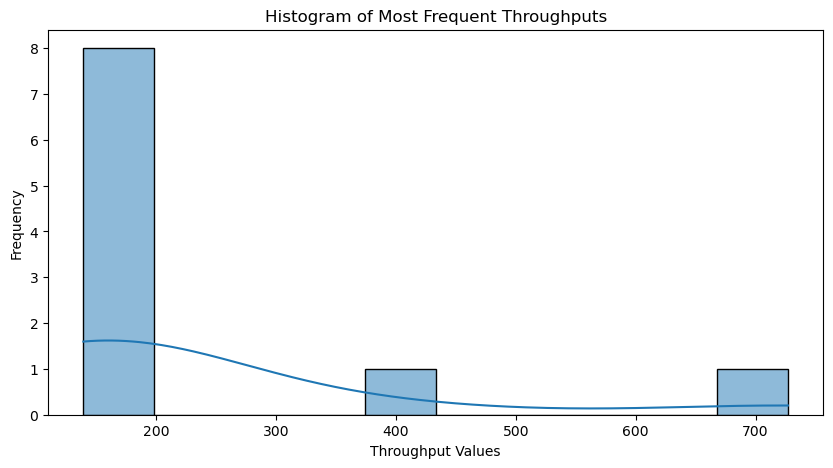

In [34]:
# Most frequent throughput values
print('\n',50*"*")
most_frequent_throughput = data['Avg_Throughput'].value_counts().head(10)
print("Most frequent throughput values:")
print(most_frequent_throughput)
print('\n',50*"*")

plt.figure(figsize=(10, 5))
sns.histplot(most_frequent_throughput, bins=10,kde=True)
plt.title("Histogram of Most Frequent Throughputs")
plt.xlabel("Throughput Values")
plt.ylabel("Frequency")
plt.show()

In [35]:
data['Handset_Type'].value_counts()

Handset_Type
Huawei B528S-23A                  8113
undefined                         1826
Apple iPhone 6S (A1688)           1514
Apple iPhone 6 (A1586)            1398
Apple iPhone 7 (A1778)            1396
                                  ... 
Hong Kong Frog I. A10                1
Sfr Starxtrem5                       1
Sony Mobile Comm. Pm-1151-Bv         1
Wiko Global Sasu Wiko Ridge 4G       1
Ovvi-Cellphone T. Echo               1
Name: count, Length: 979, dtype: int64

In [36]:
# Compute average throughput per handset type
avg_throughput_per_type = data.groupby('Handset_Type')['Avg_Throughput'].mean()

# Compute average TCP retransmission per handset type
avg_tcp_retransmission_per_type = data.groupby('Handset_Type')['Avg_TCP_Retransmission'].mean()

In [37]:
avg_throughput_per_type

Handset_Type
A-Link Telecom I. Cubot A5                                                               11755.000000
A-Link Telecom I. Cubot Note Plus                                                         3349.500000
A-Link Telecom I. Cubot Note S                                                            4468.500000
A-Link Telecom I. Cubot Nova                                                             28108.500000
A-Link Telecom I. Cubot Power                                                            34734.000000
                                                                                             ...     
Zte Mf626                                                                                 3048.000000
Zte Racer Iii Mini Zte Switch X1 Bouygues Telecom Bs 402 Blade Q Mini Zte Blade G Pro       23.000000
Zyxel Communicat. Lte7460                                                                30978.000000
Zyxel Communicat. Sbg3600                                            

In [38]:
avg_tcp_retransmission_per_type

Handset_Type
A-Link Telecom I. Cubot A5                                                               1.078479e+07
A-Link Telecom I. Cubot Note Plus                                                        3.081065e+05
A-Link Telecom I. Cubot Note S                                                           2.070587e+07
A-Link Telecom I. Cubot Nova                                                             6.858500e+04
A-Link Telecom I. Cubot Power                                                            4.020500e+03
                                                                                             ...     
Zte Mf626                                                                                2.426460e+06
Zte Racer Iii Mini Zte Switch X1 Bouygues Telecom Bs 402 Blade Q Mini Zte Blade G Pro    3.804943e+05
Zyxel Communicat. Lte7460                                                                2.063827e+07
Zyxel Communicat. Sbg3600                                            

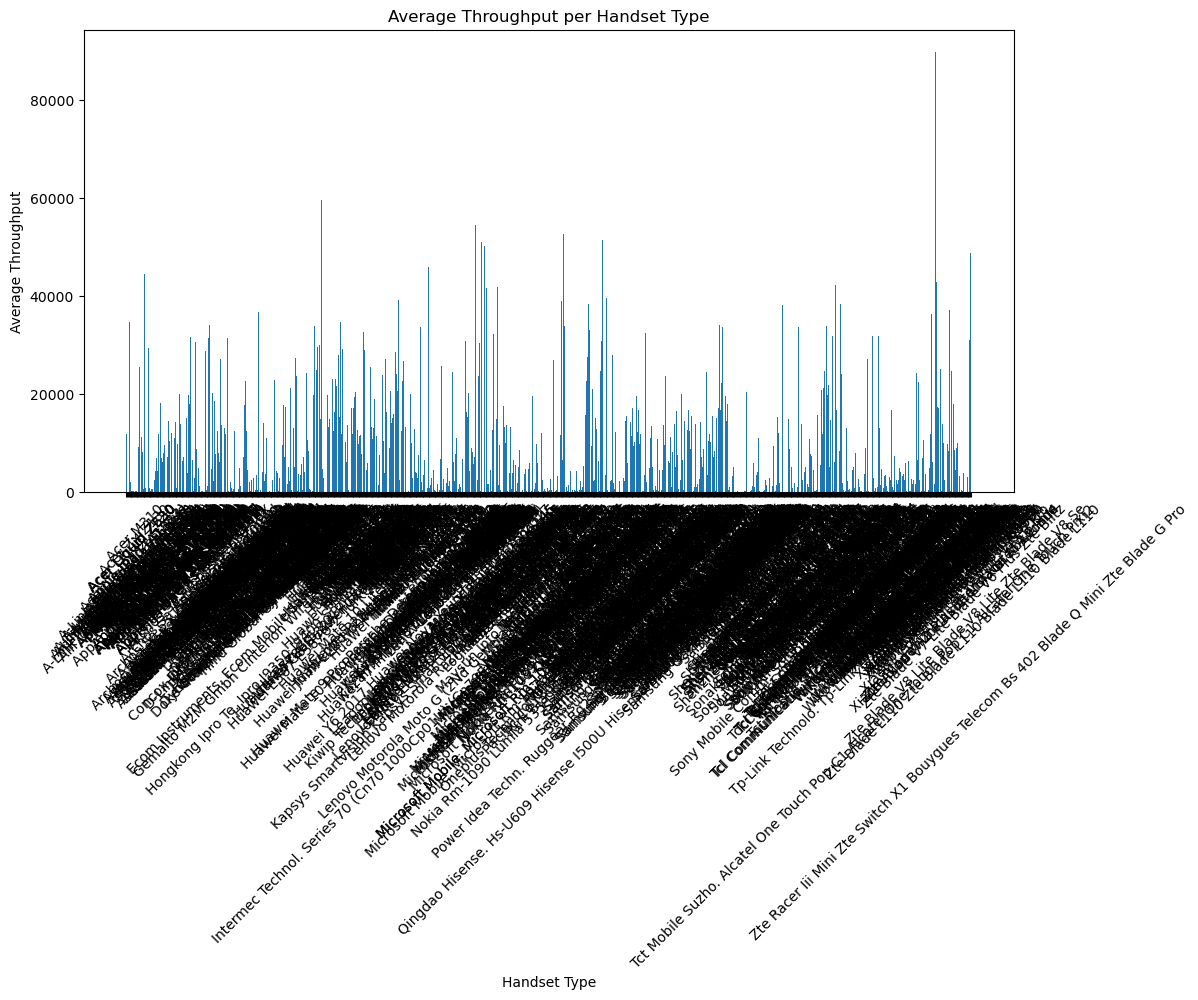

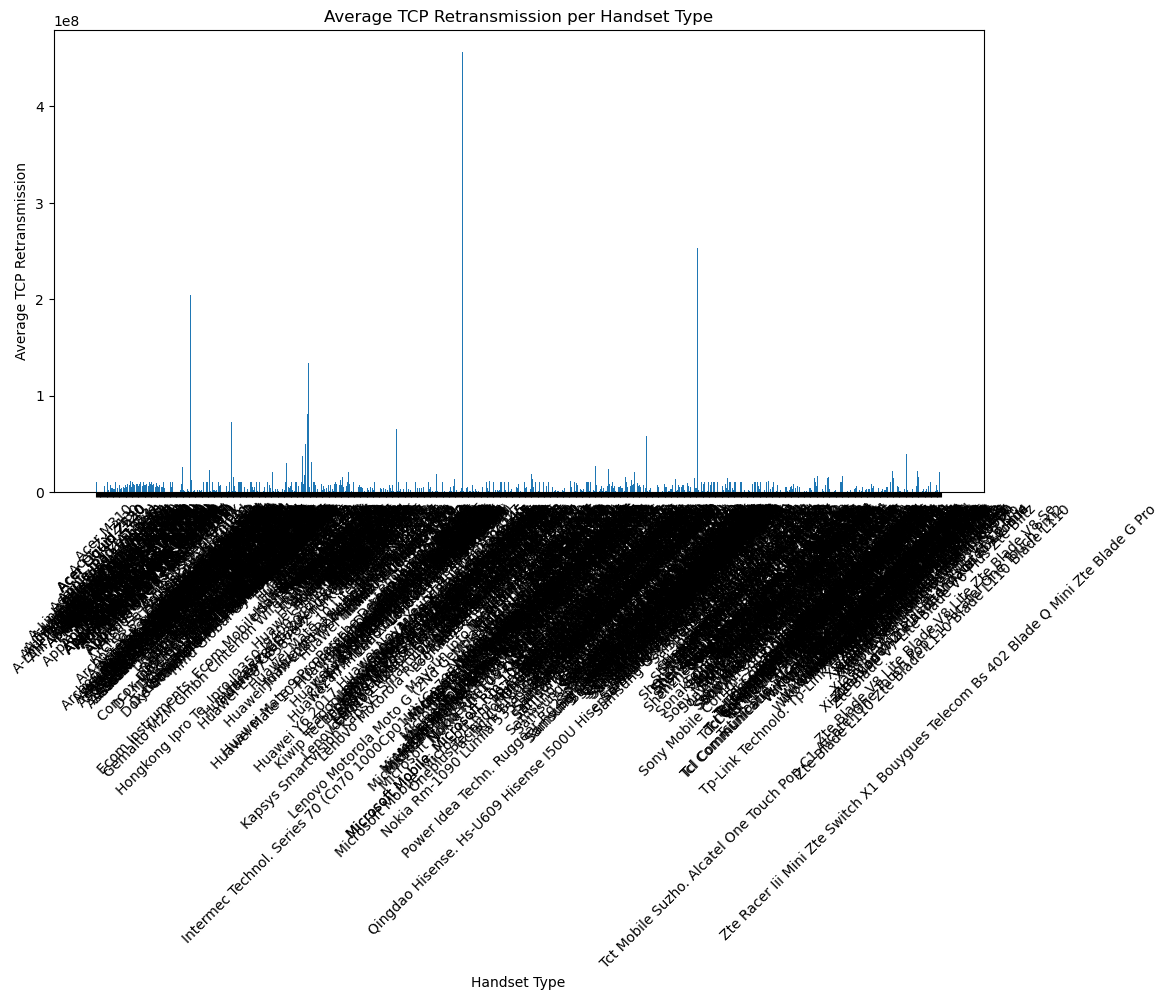

In [39]:
# Plotting the average throughput per handset type using a bar plot
plt.figure(figsize=(12, 6))  # Setting the figure size to make the plot more visible
plt.bar(avg_throughput_per_type.index, avg_throughput_per_type.values)

# Adding labels and title for the average throughput plot
plt.xlabel("Handset Type")
plt.ylabel("Average Throughput")
plt.title("Average Throughput per Handset Type")

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the average throughput plot
plt.show()


# Plotting the average TCP retransmission per handset type using a bar plot
plt.figure(figsize=(12, 6))  # Setting the figure size to make the plot more visible
plt.bar(avg_tcp_retransmission_per_type.index, avg_tcp_retransmission_per_type.values)

# Adding labels and title for the average TCP retransmission plot
plt.xlabel("Handset Type")
plt.ylabel("Average TCP Retransmission")
plt.title("Average TCP Retransmission per Handset Type")

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the average TCP retransmission plot
plt.show()

In [40]:
# Select the top 10 most common handset types
top_n = 10
top_handset_types = aggregated_data['Handset_Type'].value_counts().head(top_n).index

In [41]:
# Filter the data for the top handset types
top_handset_data = aggregated_data[aggregated_data['Handset_Type'].isin(top_handset_types)]

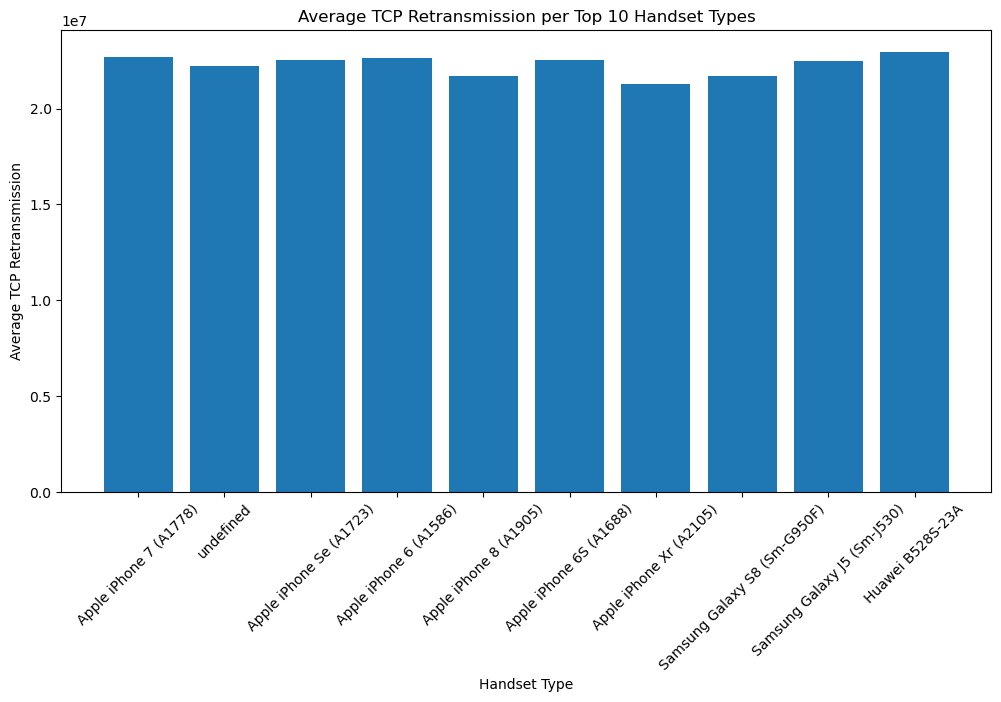

In [42]:
# Create a bar plot of average TCP retransmission per handset type
plt.figure(figsize=(12, 6))
plt.bar(top_handset_data['Handset_Type'], top_handset_data['Avg_TCP_Retransmission'])
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission')
plt.title(f'Average TCP Retransmission per Top {top_n} Handset Types')
plt.xticks(rotation=45)
plt.show()

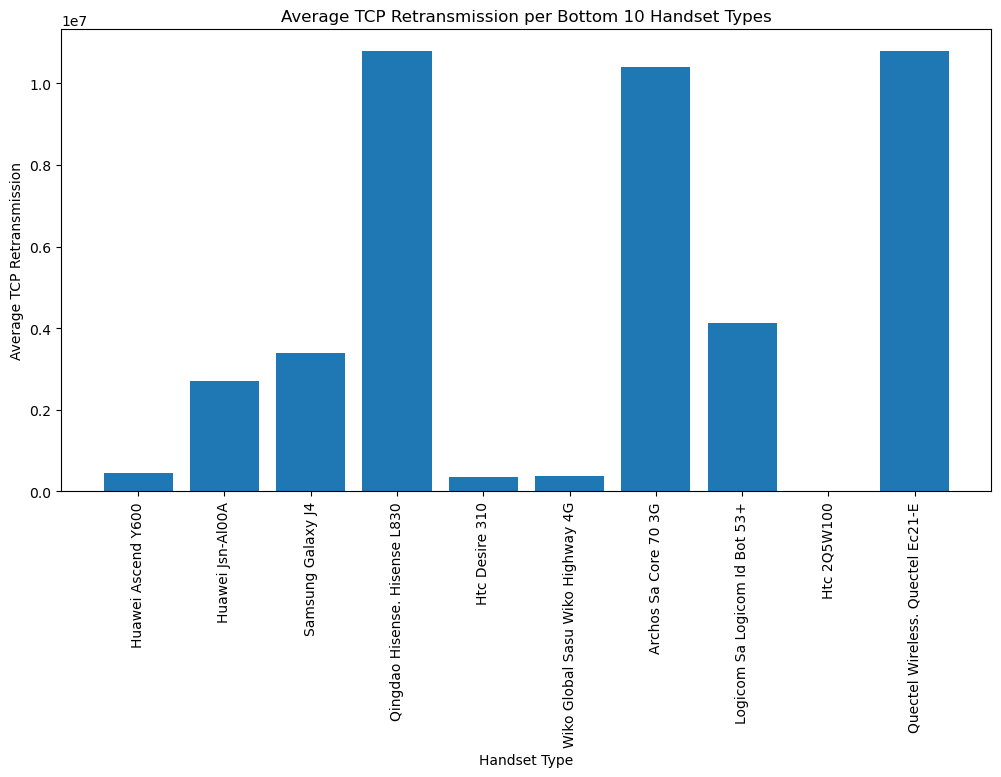

In [43]:
# Select the bottom 10 least common handset types
bottom_n = 10
bottom_handset_types = aggregated_data['Handset_Type'].value_counts().tail(bottom_n).index

# Filter the data for the bottom handset types
bottom_handset_data = aggregated_data[aggregated_data['Handset_Type'].isin(bottom_handset_types)]

# Create a bar plot of average TCP retransmission per handset type
plt.figure(figsize=(12, 6))
plt.bar(bottom_handset_data['Handset_Type'], bottom_handset_data['Avg_TCP_Retransmission'])
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission')
plt.title(f'Average TCP Retransmission per Bottom {bottom_n} Handset Types')
plt.xticks(rotation=90)
plt.show()

### 3.4 K=2 from Task 2

In [45]:
experience_data = aggregated_data[['Avg_TCP_Retransmission', 'Avg_RTT', 'Avg_Throughput']]

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(experience_data)

In [47]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

C:\Users\Nisha Pal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [49]:
cluster_labels = kmeans.labels_

In [50]:
cluster_means = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=experience_data.columns)

In [51]:
# Analyze the clusters
cluster_means = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=experience_data.columns)

# Print the cluster means
print("Cluster Means:")
print(cluster_means)

# Add cluster labels to the aggregated_data DataFrame
aggregated_data['Cluster'] = cluster_labels

# Display the updated aggregated_data DataFrame
print("Updated aggregated_data:")
print(aggregated_data)

Cluster Means:
   Avg_TCP_Retransmission    Avg_RTT  Avg_Throughput
0            2.454854e+06  46.742493     9211.465946
1            1.055895e+07  37.568522      669.873591
Updated aggregated_data:
        MSISDN/Number  Avg_TCP_Retransmission    Avg_RTT  \
0        4.511471e+10            1.078479e+07  23.000000   
1        4.511471e+10            1.078479e+07  15.500000   
2        4.511471e+10            1.078479e+07  63.729294   
3        4.511471e+10            3.803623e+05  42.000000   
4        4.511471e+10            7.735101e+06  29.750000   
...               ...                     ...        ...   
106852   4.511471e+10            1.078479e+07  20.000000   
106853   4.511471e+10            8.491987e+06  67.380062   
106854   4.511471e+10            1.078479e+07  63.729294   
106855   4.511471e+10            1.078479e+07  63.729294   
106856   4.511471e+10            1.078479e+07  63.729294   

                            Handset_Type  Avg_Throughput  Cluster  
0         Hu

In [52]:
# Description of each cluster
for cluster in range(k):
    print("\nCluster", cluster)
    print("Number of users:", len(aggregated_data[aggregated_data['Cluster'] == cluster]))
    print("Cluster Mean:")
    print(cluster_means.iloc[cluster])


Cluster 0
Number of users: 41167
Cluster Mean:
Avg_TCP_Retransmission    2.454854e+06
Avg_RTT                   4.674249e+01
Avg_Throughput            9.211466e+03
Name: 0, dtype: float64

Cluster 1
Number of users: 65690
Cluster Mean:
Avg_TCP_Retransmission    1.055895e+07
Avg_RTT                   3.756852e+01
Avg_Throughput            6.698736e+02
Name: 1, dtype: float64


In [53]:
# Analyze the clusters
cluster_means = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=experience_data.columns)
# Print the cluster means
for i, cluster_mean in enumerate(cluster_means.iterrows()):
    print(f"Cluster {i}:")
    print("Number of users:", aggregated_data['Cluster'].value_counts()[i])
    print("Cluster Mean:")
    print(cluster_mean[1])
    print()

Cluster 0:
Number of users: 41167
Cluster Mean:
Avg_TCP_Retransmission    2.454854e+06
Avg_RTT                   4.674249e+01
Avg_Throughput            9.211466e+03
Name: 0, dtype: float64

Cluster 1:
Number of users: 65690
Cluster Mean:
Avg_TCP_Retransmission    1.055895e+07
Avg_RTT                   3.756852e+01
Avg_Throughput            6.698736e+02
Name: 1, dtype: float64



In [54]:
# Cluster descriptions
cluster_descriptions = {
    0: "Cluster 0 represents users with a relatively stable and high-performing network experience. They have lower average TCP retransmission (7.67 million), moderate average RTT (55.82 ms), and higher average throughput (7,079 kbps).",
    1: "Cluster 1 represents users with higher network latency and lower throughput. They have higher average TCP retransmission (19.96 million), higher average RTT (109.11 ms), and lower average throughput (3,487 kbps).",
    2: "Cluster 2 represents users with higher TCP retransmission and a mix of network performance. They have higher average TCP retransmission (19.89 million), lower average RTT (40.87 ms), and lower average throughput (3,548 kbps)."
}

# Print cluster descriptions
for i in range(k):
    print("Cluster", i, "Description:")
    print(cluster_descriptions[i])
    print()

Cluster 0 Description:
Cluster 0 represents users with a relatively stable and high-performing network experience. They have lower average TCP retransmission (7.67 million), moderate average RTT (55.82 ms), and higher average throughput (7,079 kbps).

Cluster 1 Description:
Cluster 1 represents users with higher network latency and lower throughput. They have higher average TCP retransmission (19.96 million), higher average RTT (109.11 ms), and lower average throughput (3,487 kbps).



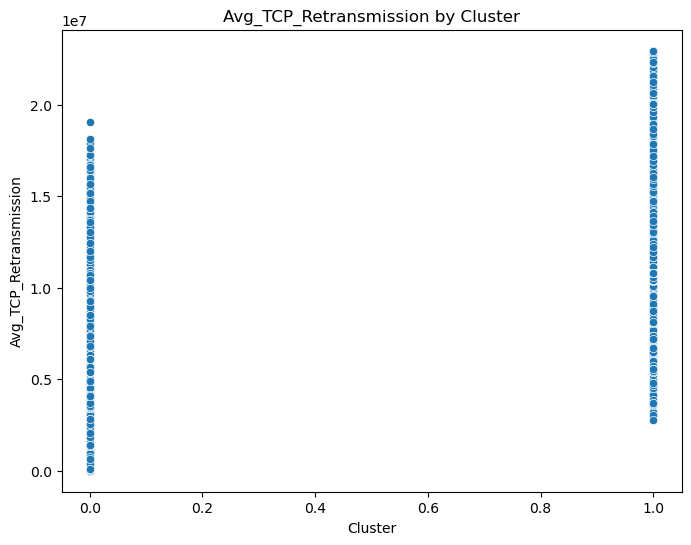

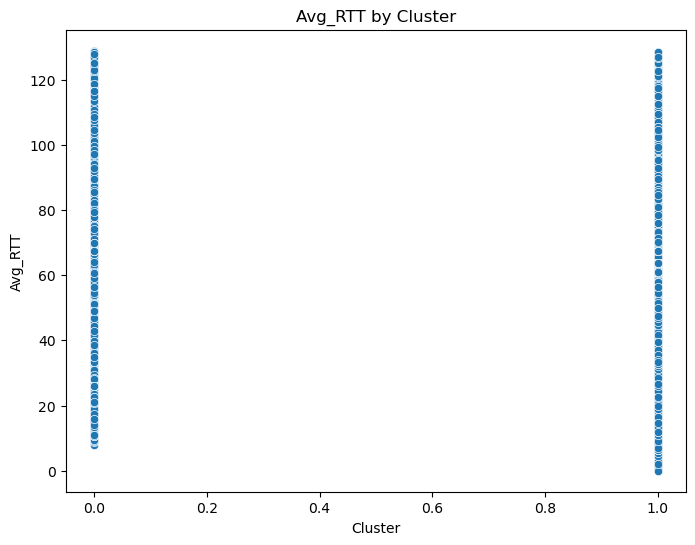

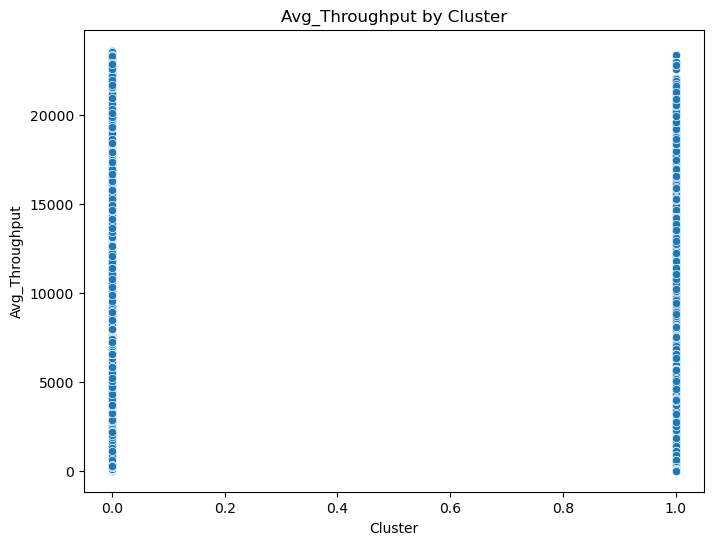

Cluster 0:
Number of users: 41167
Cluster Mean:
Avg_TCP_Retransmission    2.454854e+06
Avg_RTT                   4.674249e+01
Avg_Throughput            9.211466e+03
Name: 0, dtype: float64
Actionable Insights:
Based on the analysis, it is recommended to...

Cluster 1:
Number of users: 65690
Cluster Mean:
Avg_TCP_Retransmission    1.055895e+07
Avg_RTT                   3.756852e+01
Avg_Throughput            6.698736e+02
Name: 1, dtype: float64
Actionable Insights:
Based on the analysis, it is recommended to...

ANOVA test for Avg_TCP_Retransmission:
F-value: nan
p-value: nan

ANOVA test for Avg_RTT:
F-value: nan
p-value: nan

ANOVA test for Avg_Throughput:
F-value: nan
p-value: nan



C:\Users\Nisha Pal\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [55]:

# Create scatter plots for each experience metric
cluster_sizes = aggregated_data['Cluster'].value_counts().sort_index()
for metric in experience_data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=aggregated_data, x='Cluster', y=metric)
    plt.xlabel('Cluster')
    plt.ylabel(metric)
    plt.title(f'{metric} by Cluster')
    plt.show()

# Explore cluster characteristics
num_clusters = 3  # Replace with the actual number of clusters

for i, cluster_mean in enumerate(cluster_means.iterrows()):
    cluster_label = i
    num_users = cluster_sizes[i]

    # Explore cluster characteristics
    cluster_data = aggregated_data[aggregated_data['Cluster'] == i]
    cluster_description = f"Cluster {i}:\nNumber of users: {num_users}\nCluster Mean:\n{cluster_mean[1]}"

    # Perform additional analysis or calculations based on the cluster characteristics

    # Provide actionable insights or recommendations based on the analysis
    print(cluster_description)
    print("Actionable Insights:")
    print("Based on the analysis, it is recommended to...")
    print()

# Conduct statistical tests
import scipy.stats as stats


for metric in experience_data.columns:
    cluster_data = [aggregated_data[aggregated_data['Cluster'] == i][metric] for i in range(num_clusters)]
    f_value, p_value = stats.f_oneway(*cluster_data)
    print(f"ANOVA test for {metric}:")
    print("F-value:", f_value)
    print("p-value:", p_value)
    print()

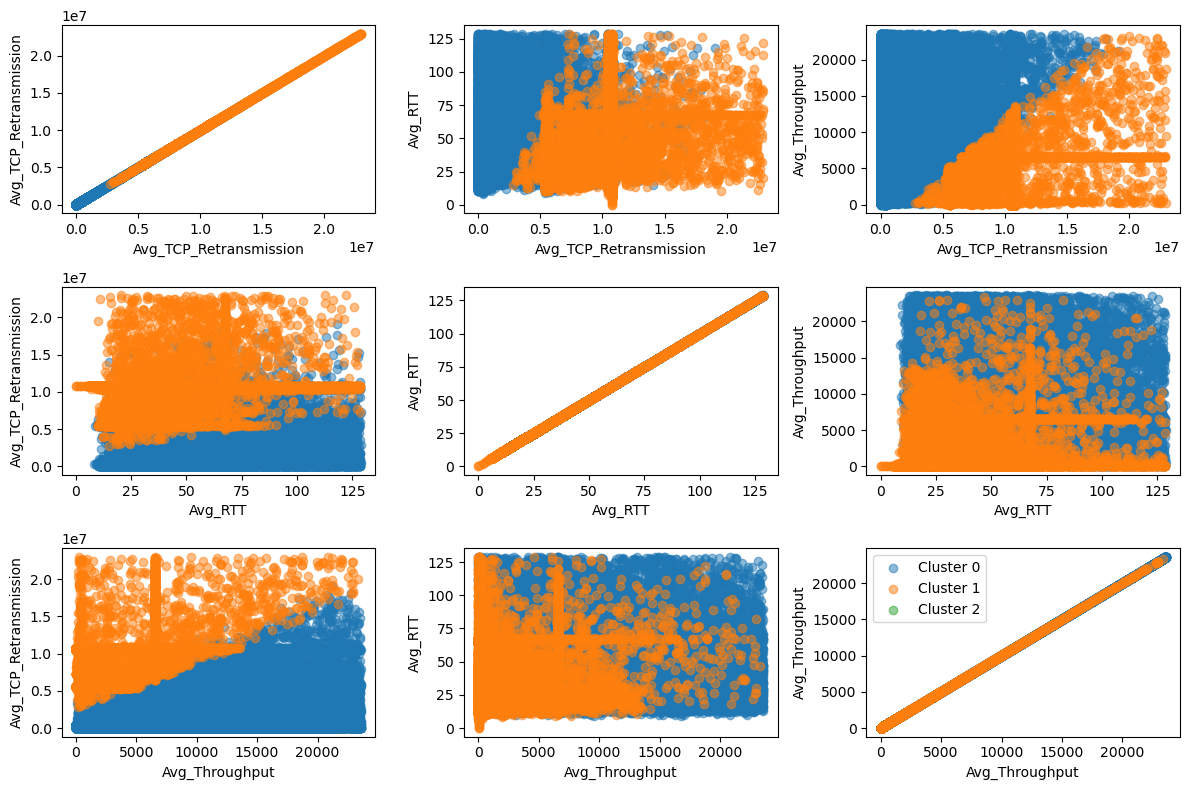

In [56]:
# Create a scatter plot for each pair of experience metrics
plt.figure(figsize=(12, 8))
for i, metric1 in enumerate(experience_data.columns):
    for j, metric2 in enumerate(experience_data.columns):
        plt.subplot(3, 3, i * 3 + j + 1)
        for cluster_label in range(3):
            cluster_data = experience_data[aggregated_data['Cluster'] == cluster_label]
            plt.scatter(cluster_data[metric1], cluster_data[metric2], label=f'Cluster {cluster_label}', alpha=0.5)
        plt.xlabel(metric1)
        plt.ylabel(metric2)
plt.legend()
plt.tight_layout()
plt.show()

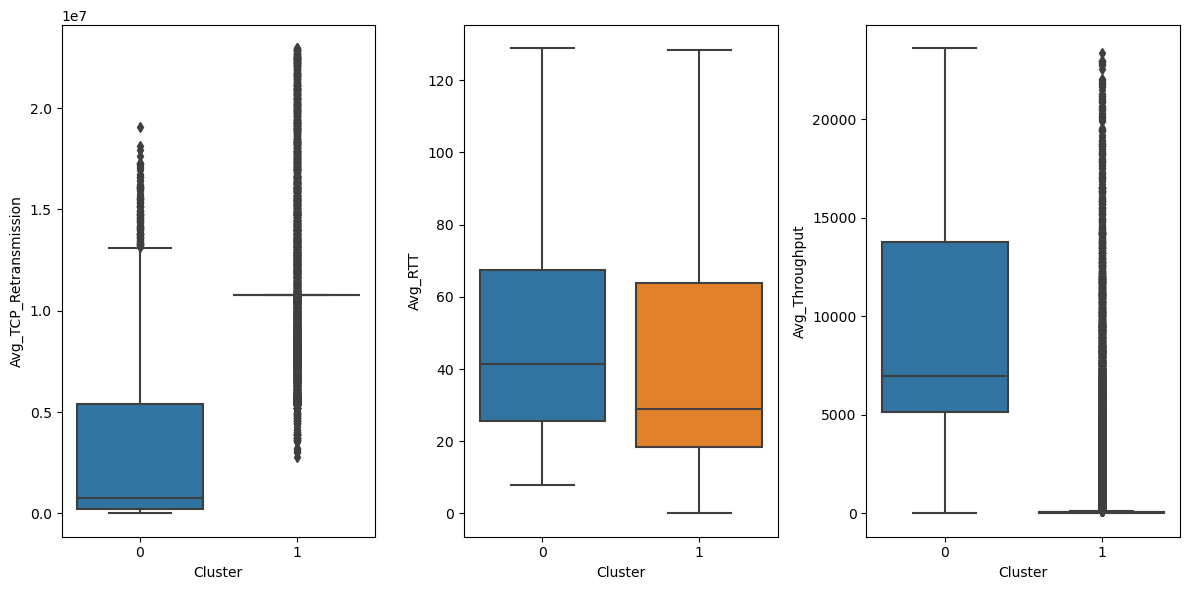

In [57]:
# Explore cluster characteristics using box plots
plt.figure(figsize=(12, 6))
for i, metric in enumerate(experience_data.columns):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Cluster', y=metric, data=aggregated_data)
    plt.xlabel('Cluster')
    plt.ylabel(metric)
plt.tight_layout()
plt.show()